Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

 - Customers who left within the last month – the column is called Churn
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 - Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
from scipy import stats
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
sns.set_style(style='whitegrid')

In [2]:
#Define the location of the Data
path = '../data/'

In [3]:
#open the dataset
df = pd.read_csv(f'{path}raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def resumetable(df):
    '''
    Returns few key metrics of a dataframe.
    '''
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [5]:
resumetable(df)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK,12.78
1,gender,object,0,2,Female,Male,Male,1.00
2,SeniorCitizen,int64,0,2,0,0,0,0.64
3,Partner,object,0,2,Yes,No,No,1.00
4,Dependents,object,0,2,No,No,No,0.88
5,tenure,int64,0,73,1,34,2,5.92
6,PhoneService,object,0,2,No,Yes,Yes,0.46
7,MultipleLines,object,0,3,No phone service,No,No,1.36
8,InternetService,object,0,3,DSL,DSL,DSL,1.53
9,OnlineSecurity,object,0,3,No,Yes,Yes,1.50


 - customerID Customer ID
 - gender Whether the customer is a male or a female
 - SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
 - Partner Whether the customer has a partner or not (Yes, No)
 - Dependents Whether the customer has dependents or not (Yes, No)
 - tenure Number of months the customer has stayed with the company
 - PhoneService Whether the customer has a phone service or not (Yes, No)
 - MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
 - InternetService Customer’s internet service provider (DSL, Fiber optic, No)
 - OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
 - OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
 - DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
 - TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
 - StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
 - StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
 - Contract The contract term of the customer (Month-to-month, One year, Two year)
 - PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
 - PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
 - MonthlyCharges The amount charged to the customer monthly
 - TotalCharges The total amount charged to the customer
 - Churn Whether the customer churned or not (Yes or No)

In [6]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [7]:
#Relable 1 and 0 with yes and no, repectively for consistency
df['SeniorCitizen'] = df.SeniorCitizen.replace({1:"Yes", 0:"No"})

# EDA

## Customer Churn by Category

Let's extract the category columns to perform EDA on all items at once. Some categories also have 3 unique values. We'll see why.

In [8]:
df.columns[1:-3]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [9]:
categories = list(df.columns[1:-3])

In [10]:
categories.pop(4)

'tenure'

In [11]:
#categorical features are:
categories

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [12]:
non_cats = []
for item in enumerate(list(~df.columns.isin(categories))):
    if item[1] == True:
        non_cats.append(df.columns[item[0]])

In [13]:
non_cats.pop(0)

'customerID'

In [14]:
non_cats.pop(-1)

'Churn'

In [15]:
#Non-categorical features
non_cats

['tenure', 'MonthlyCharges', 'TotalCharges']

Plotting each categorical feature split by Churn: No/Yes and percentage of customers in each group.

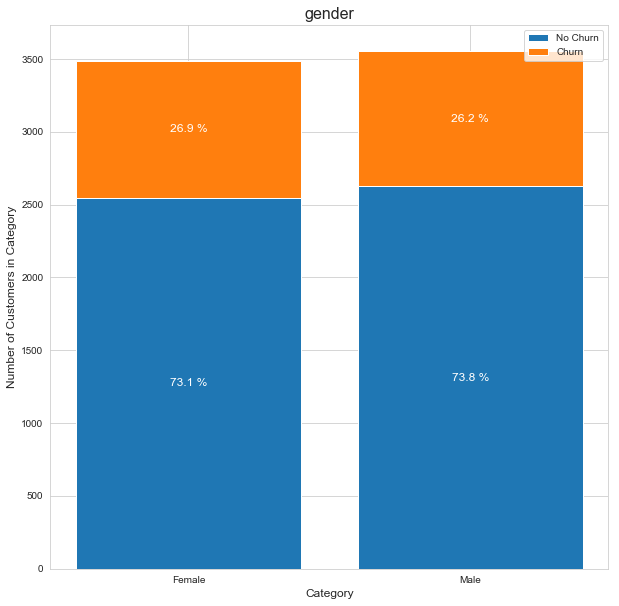

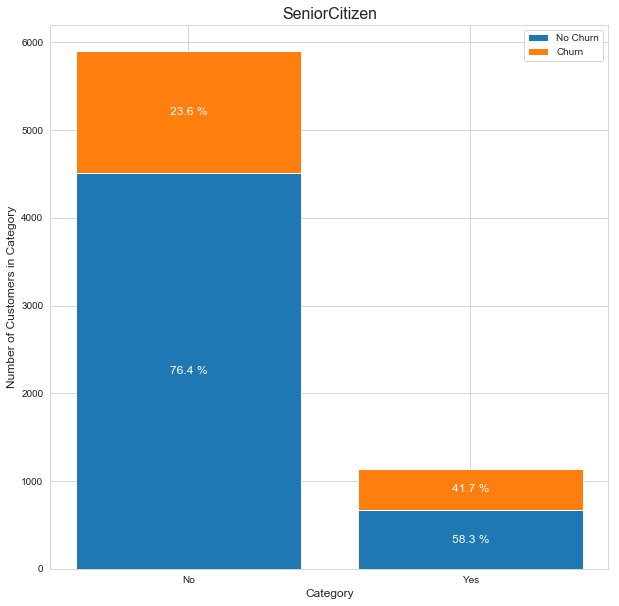

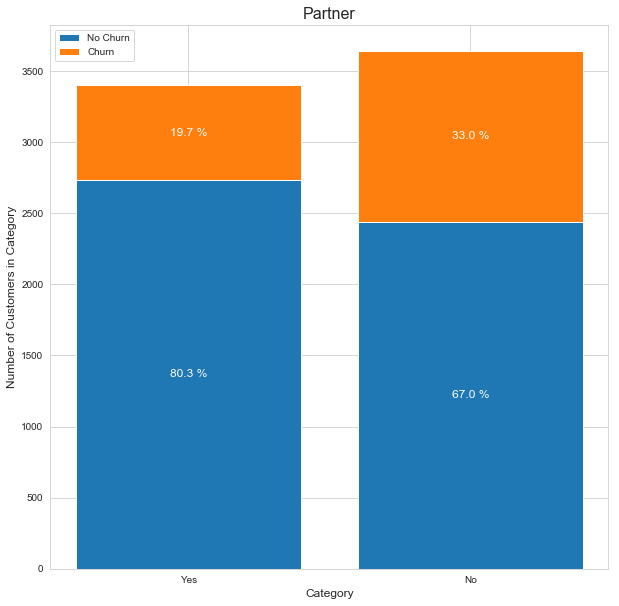

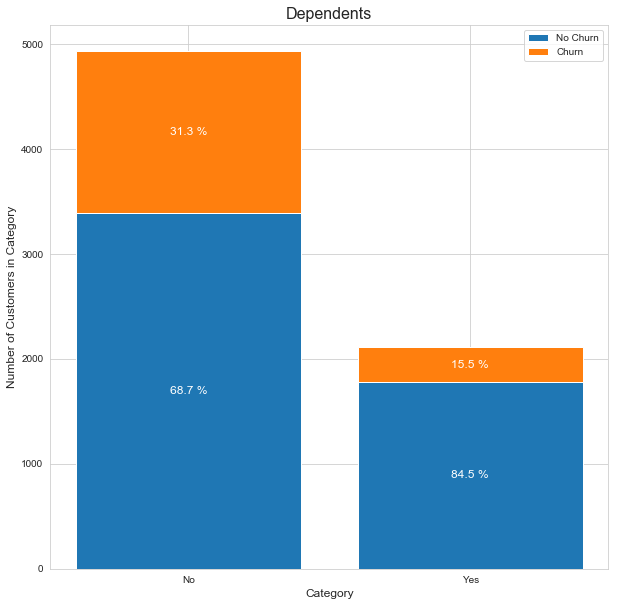

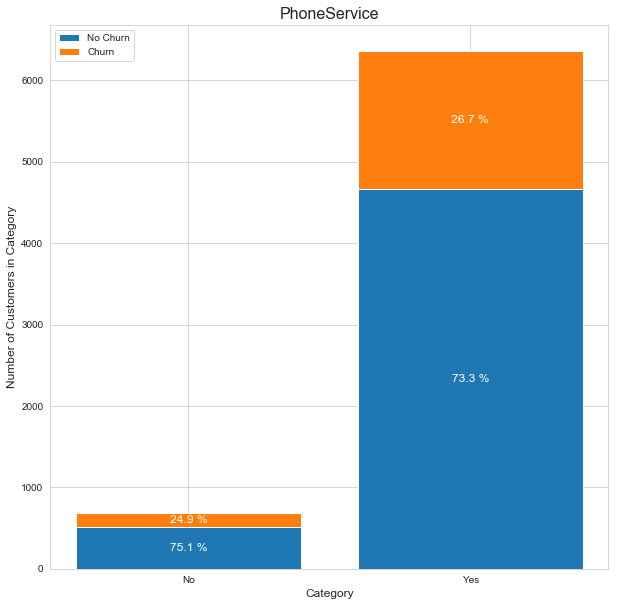

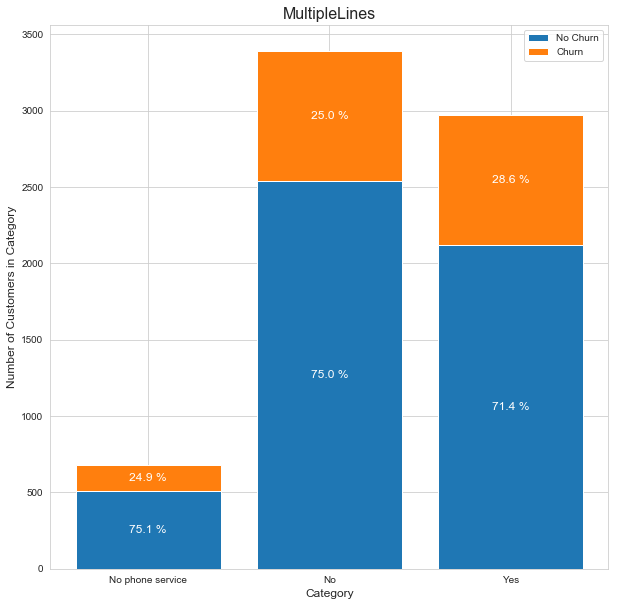

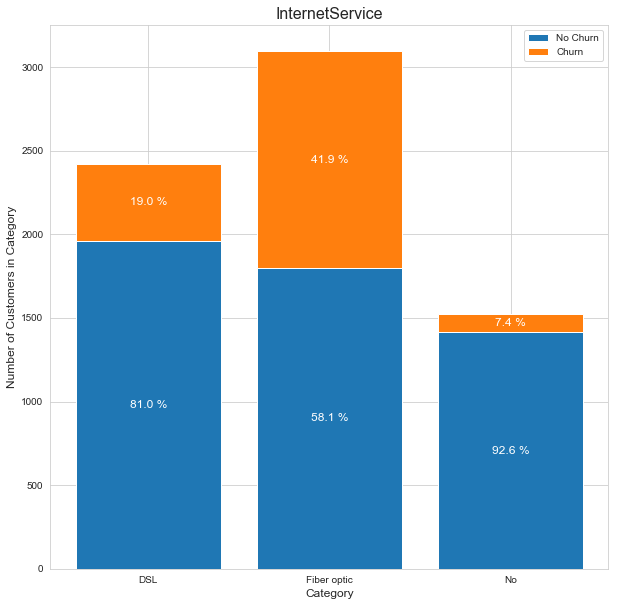

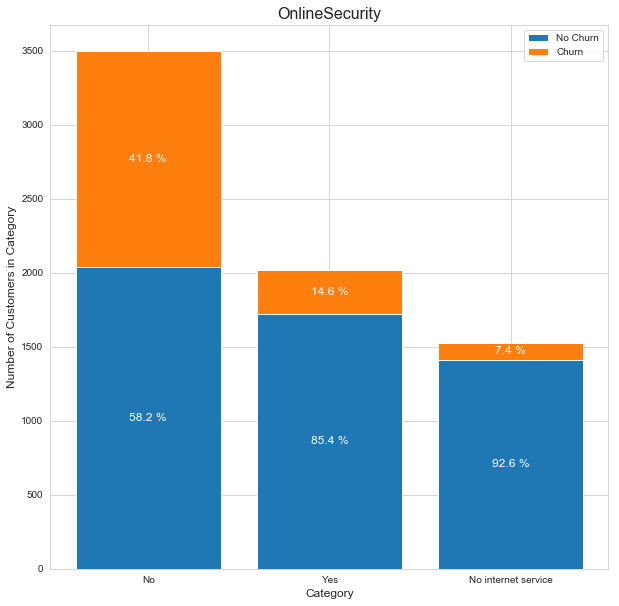

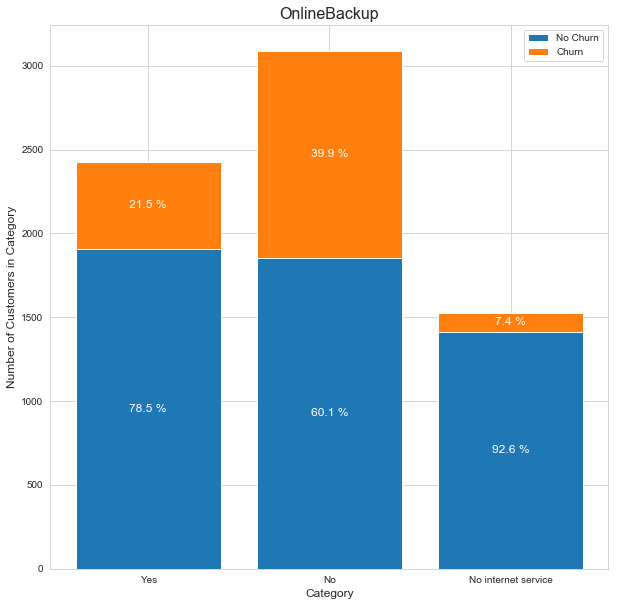

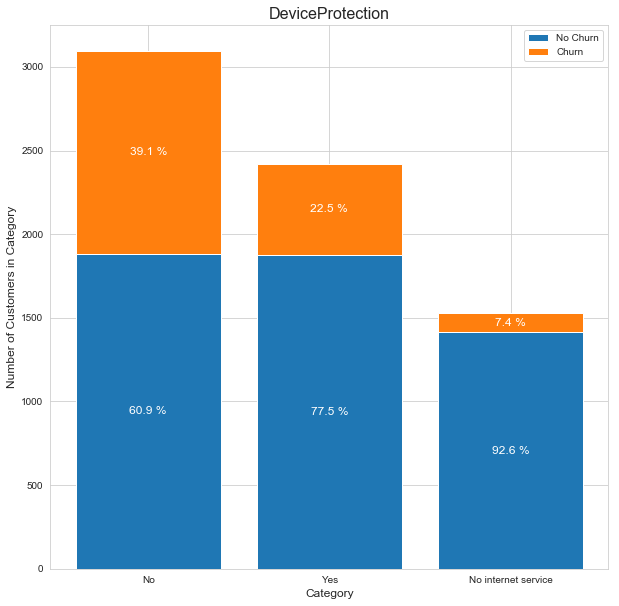

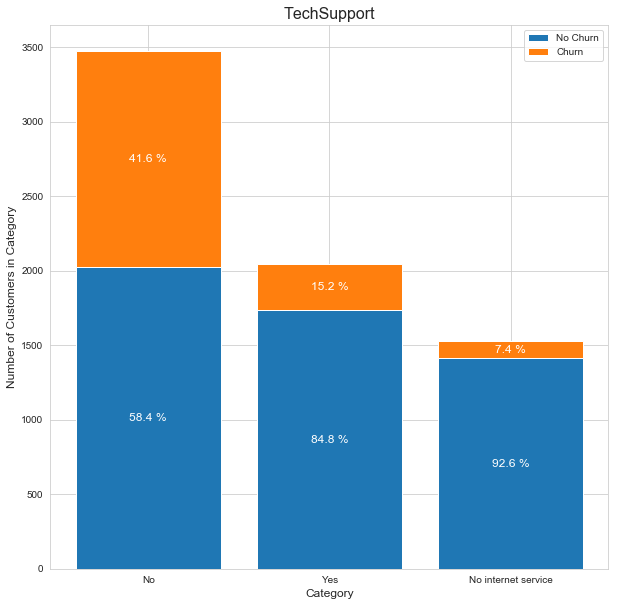

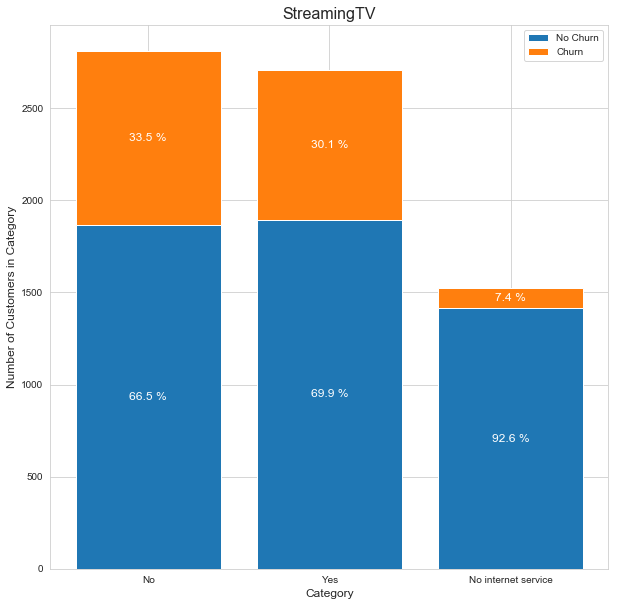

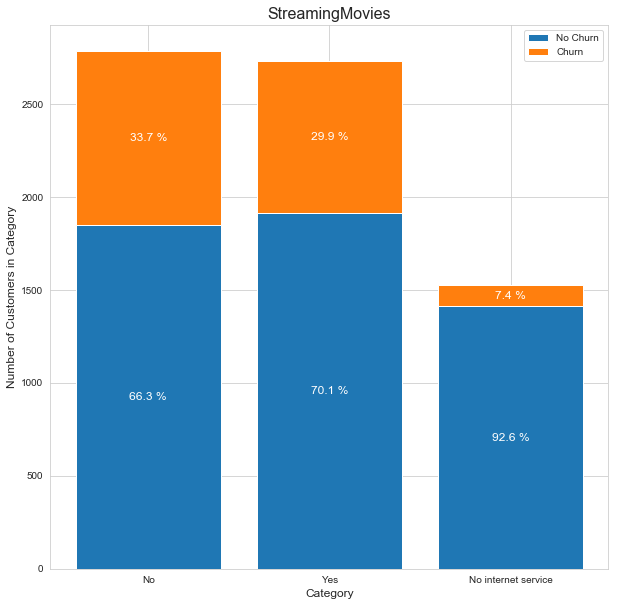

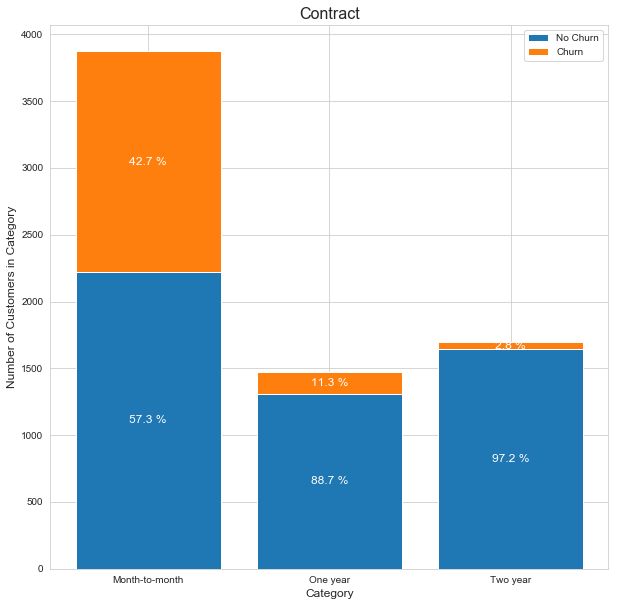

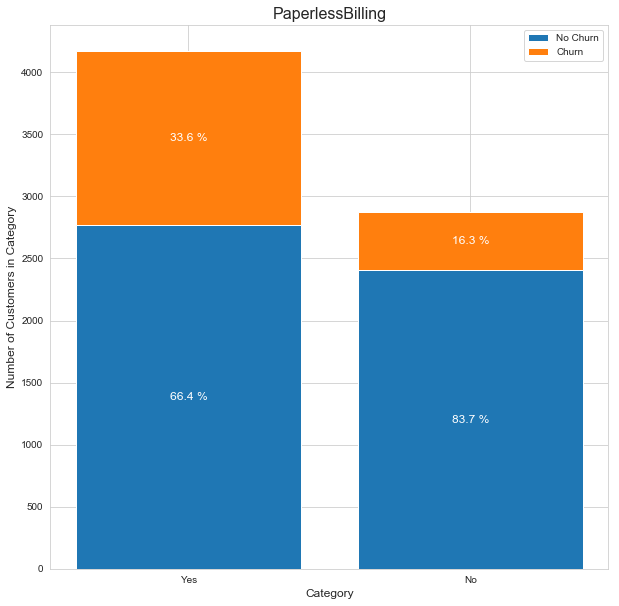

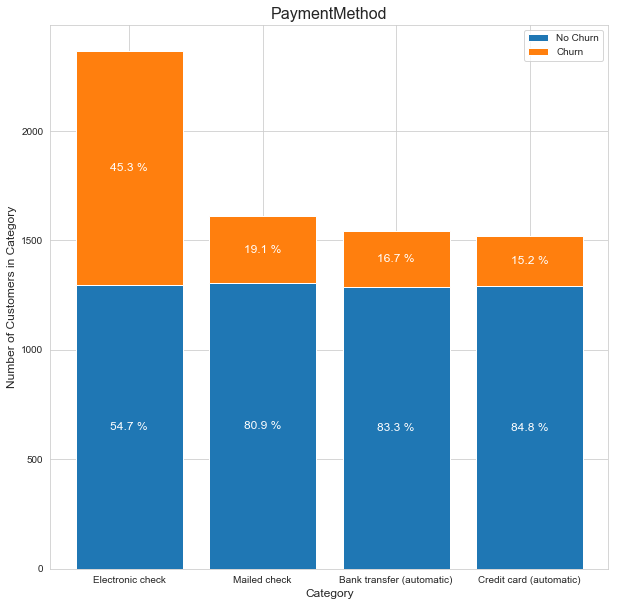

In [16]:
for cat in categories:
    fig, ax = plt.subplots(figsize = (10,10))
    churn_no = []
    churn_yes = []
    x = []
    for i in df[cat].unique():
        #each category has a sub-category: e.g. Gender category has male and female
        #looping through each subcategory and adding churn and no churn data to list
        churn_no.append(df.groupby([cat, 'Churn']).size()[i][0])
        churn_yes.append(df.groupby([cat, 'Churn']).size()[i][1])
        x.append(i)
    #print(churn_no, churn_yes)
    
    p1 = plt.bar(x, churn_no)
    p2 = plt.bar(x, churn_yes, bottom=churn_no)

    #Plotting the bar labels inside the bars, as percentage
    for r1, r2, in zip(p1, p2):
        height1 = r1.get_height()
        height2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., #x
                 height1 / 2., #y
                 f'{round(height1 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)
        plt.text(r2.get_x() + r2.get_width() / 2., #x
                 height1 + height2 / 2., #y
                 f'{round(height2 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)


    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Number of Customers in Category', fontsize=12)
    plt.legend(['No Churn','Churn'])
    plt.title(cat, fontsize=16)
    plt.show()

 - Gender: Gender has almost a 50/50 split and negligible difference in churn percentages.
 -	Senior Citizens: Senior citizens have close to double the rate of churn; however, they make up only 1/6th of the total customer population
 -	Partner: The split between population is almost equal with ~3,500 customers in each group. The percentage of customers that churn, however, is 30% higher if the customer is without a partner.
 -	Dependents: Customers are more likely to churn if they have no dependents, however, the split in customers based on dependents is imbalanced. 
 -	Phone Service: Rate of churn is similar regardless whether a customer has phone service or not.
 -	Multiple Lines: of the customers that have phone service, the ones that have multiple lines have similar churn rates of those who only have one line.
 -	Internet Service: Out of the customers that have internet service, customers with Fiber Optic service have double the rate of churn than those with DSL.
 -	Online Security: Of the customers that have internet service, ones without online security have a triple the churn rate than those who opted in for online security. May be worth investigating this feature further. 
 -	Online Backup / Device Protection: Of the customers that have internet service, customers with these features have half the rate of churn than those that don’t
 -	Tech Support: Of the customers that have internet service, those that use tech support have a significantly lower rate of churn. Note, the number of customers that use tech support is significantly less than those who don’t.
 -	Streaming TV / Streaming Movies: Of the customers that have internet service, no significant change in churn rate can be seen whether a customer uses the streaming service.
 -	Contract: Customers on contract have significantly lower churn rates than those that are month to month. This is expected.
 -	Paperless Billing: Customers on paperless billing have higher rates of churn. 
 -	Payment Method: Electronic Check customers have double the rate of churn than those using other payment methods.



## Customer Churn by non-categorical items

In [17]:
non_cats

['tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
len(df.tenure.unique())

73

Text(0, 0.5, 'Count of Customers')

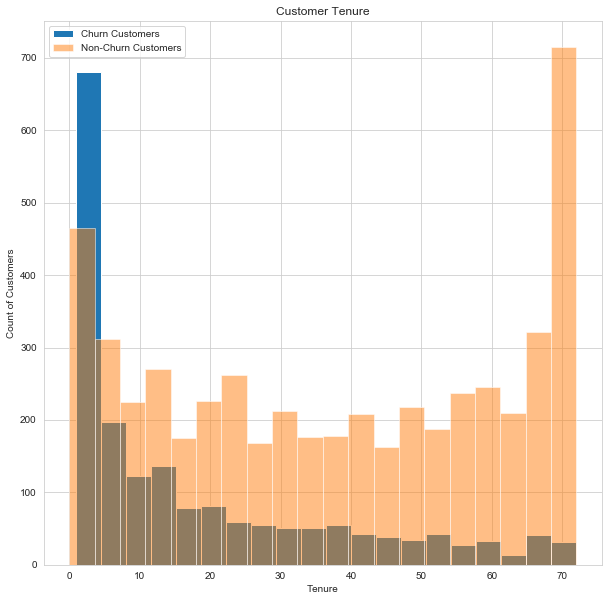

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
df.tenure[df.Churn == 'Yes'].hist(bins=20)
df.tenure[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count of Customers')

The longer a customer stays, the less likely they are to churn (tenure by month)

Text(0, 0.5, 'Count of Customers')

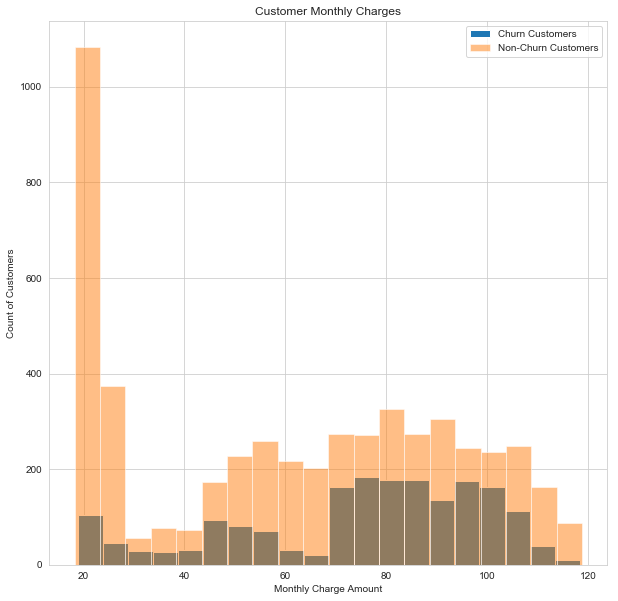

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
df.MonthlyCharges[df.Churn == 'Yes'].hist(bins=20)
df.MonthlyCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Monthly Charges')
plt.xlabel('Monthly Charge Amount')
plt.ylabel('Count of Customers')

Text(0, 0.5, 'Count of Customers')

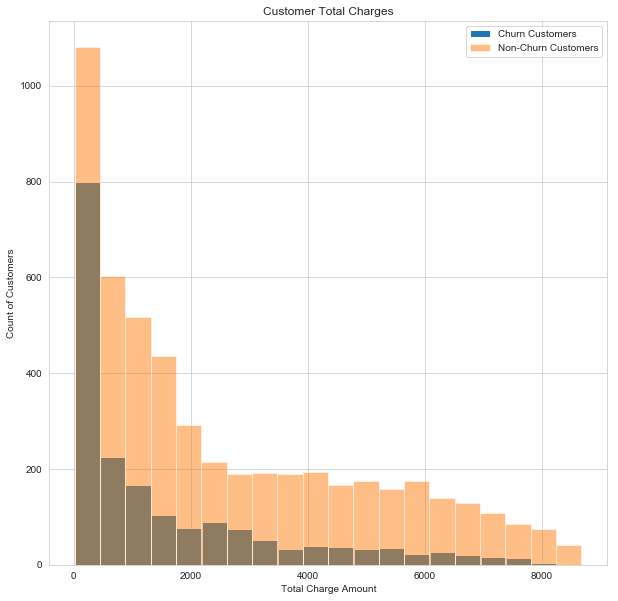

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
df.TotalCharges[df.Churn == 'Yes'].hist(bins=20)
df.TotalCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Total Charges')
plt.xlabel('Total Charge Amount')
plt.ylabel('Count of Customers')

## Churn Imbalance

In [22]:
df.groupby('Churn').size().values

array([5174, 1869])

In [23]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

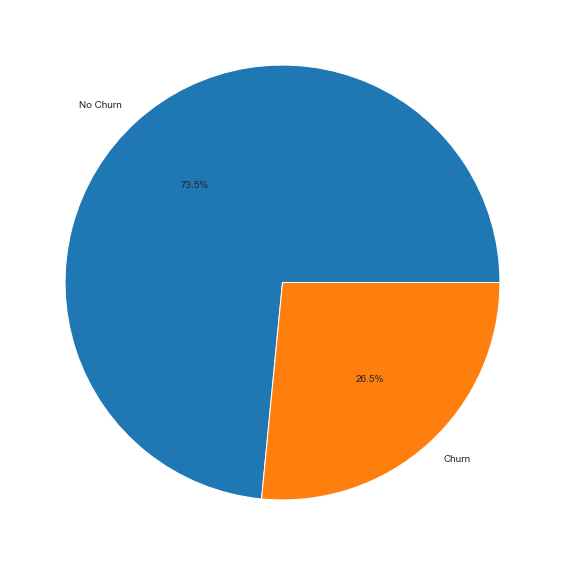

In [24]:
fig, ax = plt.subplots(figsize = (10,10))
labels = 'No Churn', 'Churn'
x = df.groupby('Churn').size().values
ax.pie(x, autopct='%1.1f%%', labels=labels)
plt.show()

## Correlation

Correlation will indicate which variables are related to one another and to the target

### Encode the dataframe

The dataframe needs to be encoded into numerical values in order to make the comparison. e.g. Yes/No will need to be converted to 1 / 0. Scikit-Learn's LabelEncoder will be utilized

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
categories

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [28]:
non_cats

['tenure', 'MonthlyCharges', 'TotalCharges']

In [29]:
other = ['customerID', 'Churn']

In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We'll have to encode all categorical values in the dataframe. We already defined the lists 'categories' and 'other'.

In [31]:
encoded_df = pd.DataFrame()

In [32]:
for item in categories:
    encoded_df[item] = le.fit_transform(df[item].values)

In [33]:
for item in non_cats:
    encoded_df[item] = df[item]

In [34]:
for item in other:
    encoded_df[item] = le.fit_transform(df[item].values)

In [35]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,1,29.85,29.85,5375,0
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,34,56.95,1889.50,3962,0
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,2,53.85,108.15,2564,1
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,45,42.30,1840.75,5535,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,2,70.70,151.65,6511,1


In [36]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", linewidths=.2)
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

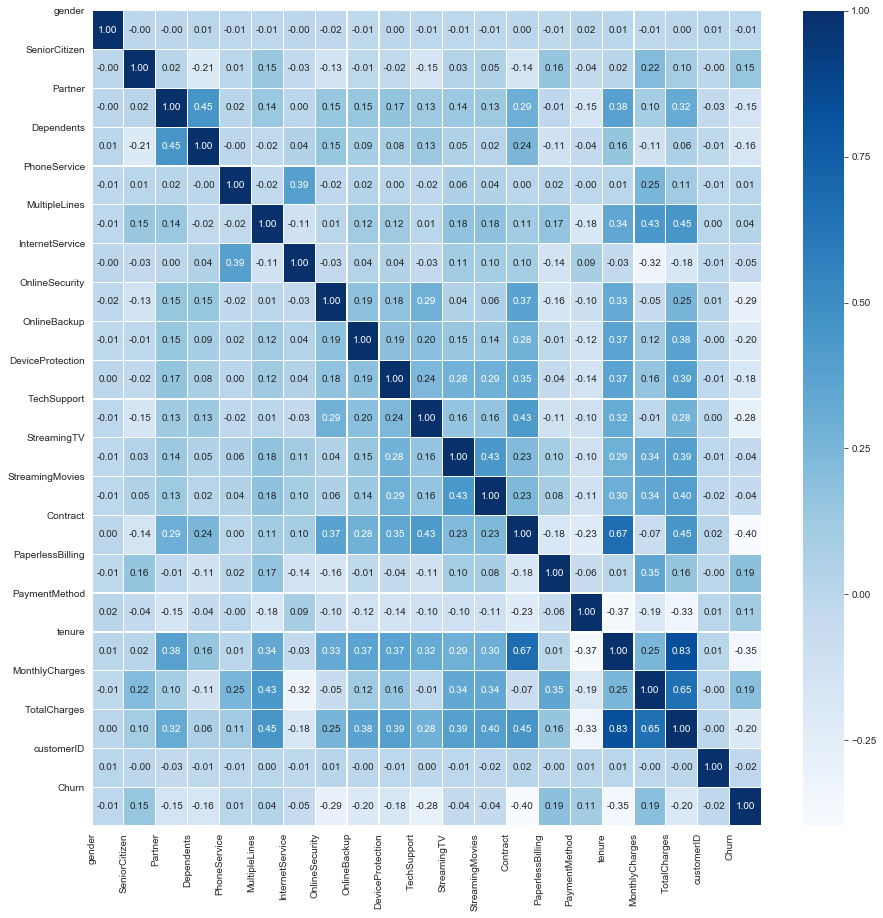

In [37]:
heatMap(encoded_df)

### Correlation to Churn

In [38]:
encoded_df.columns[0:]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'customerID', 'Churn'],
      dtype='object')

In [39]:
corr_df = encoded_df[encoded_df.columns[0:]].corr()['Churn'][:]

In [40]:
np.abs(corr_df).sort_values(ascending=False)[1:6]

Contract          0.396713
tenure            0.352229
OnlineSecurity    0.289309
TechSupport       0.282492
TotalCharges      0.199484
Name: Churn, dtype: float64

From the heatmap we can see a number of negatively and positively correlated features. We can focus on these during the feature engineering stage. Contract, tenure, OnlineSecurity, TechSupport, TotalCharges.

## Scatterplot

Next we can see if there is any indication of churn in the amount a customer spends. Since TotalCharges is correlated with Churn, it's a good idea to look at this variable to see if there is any signal.

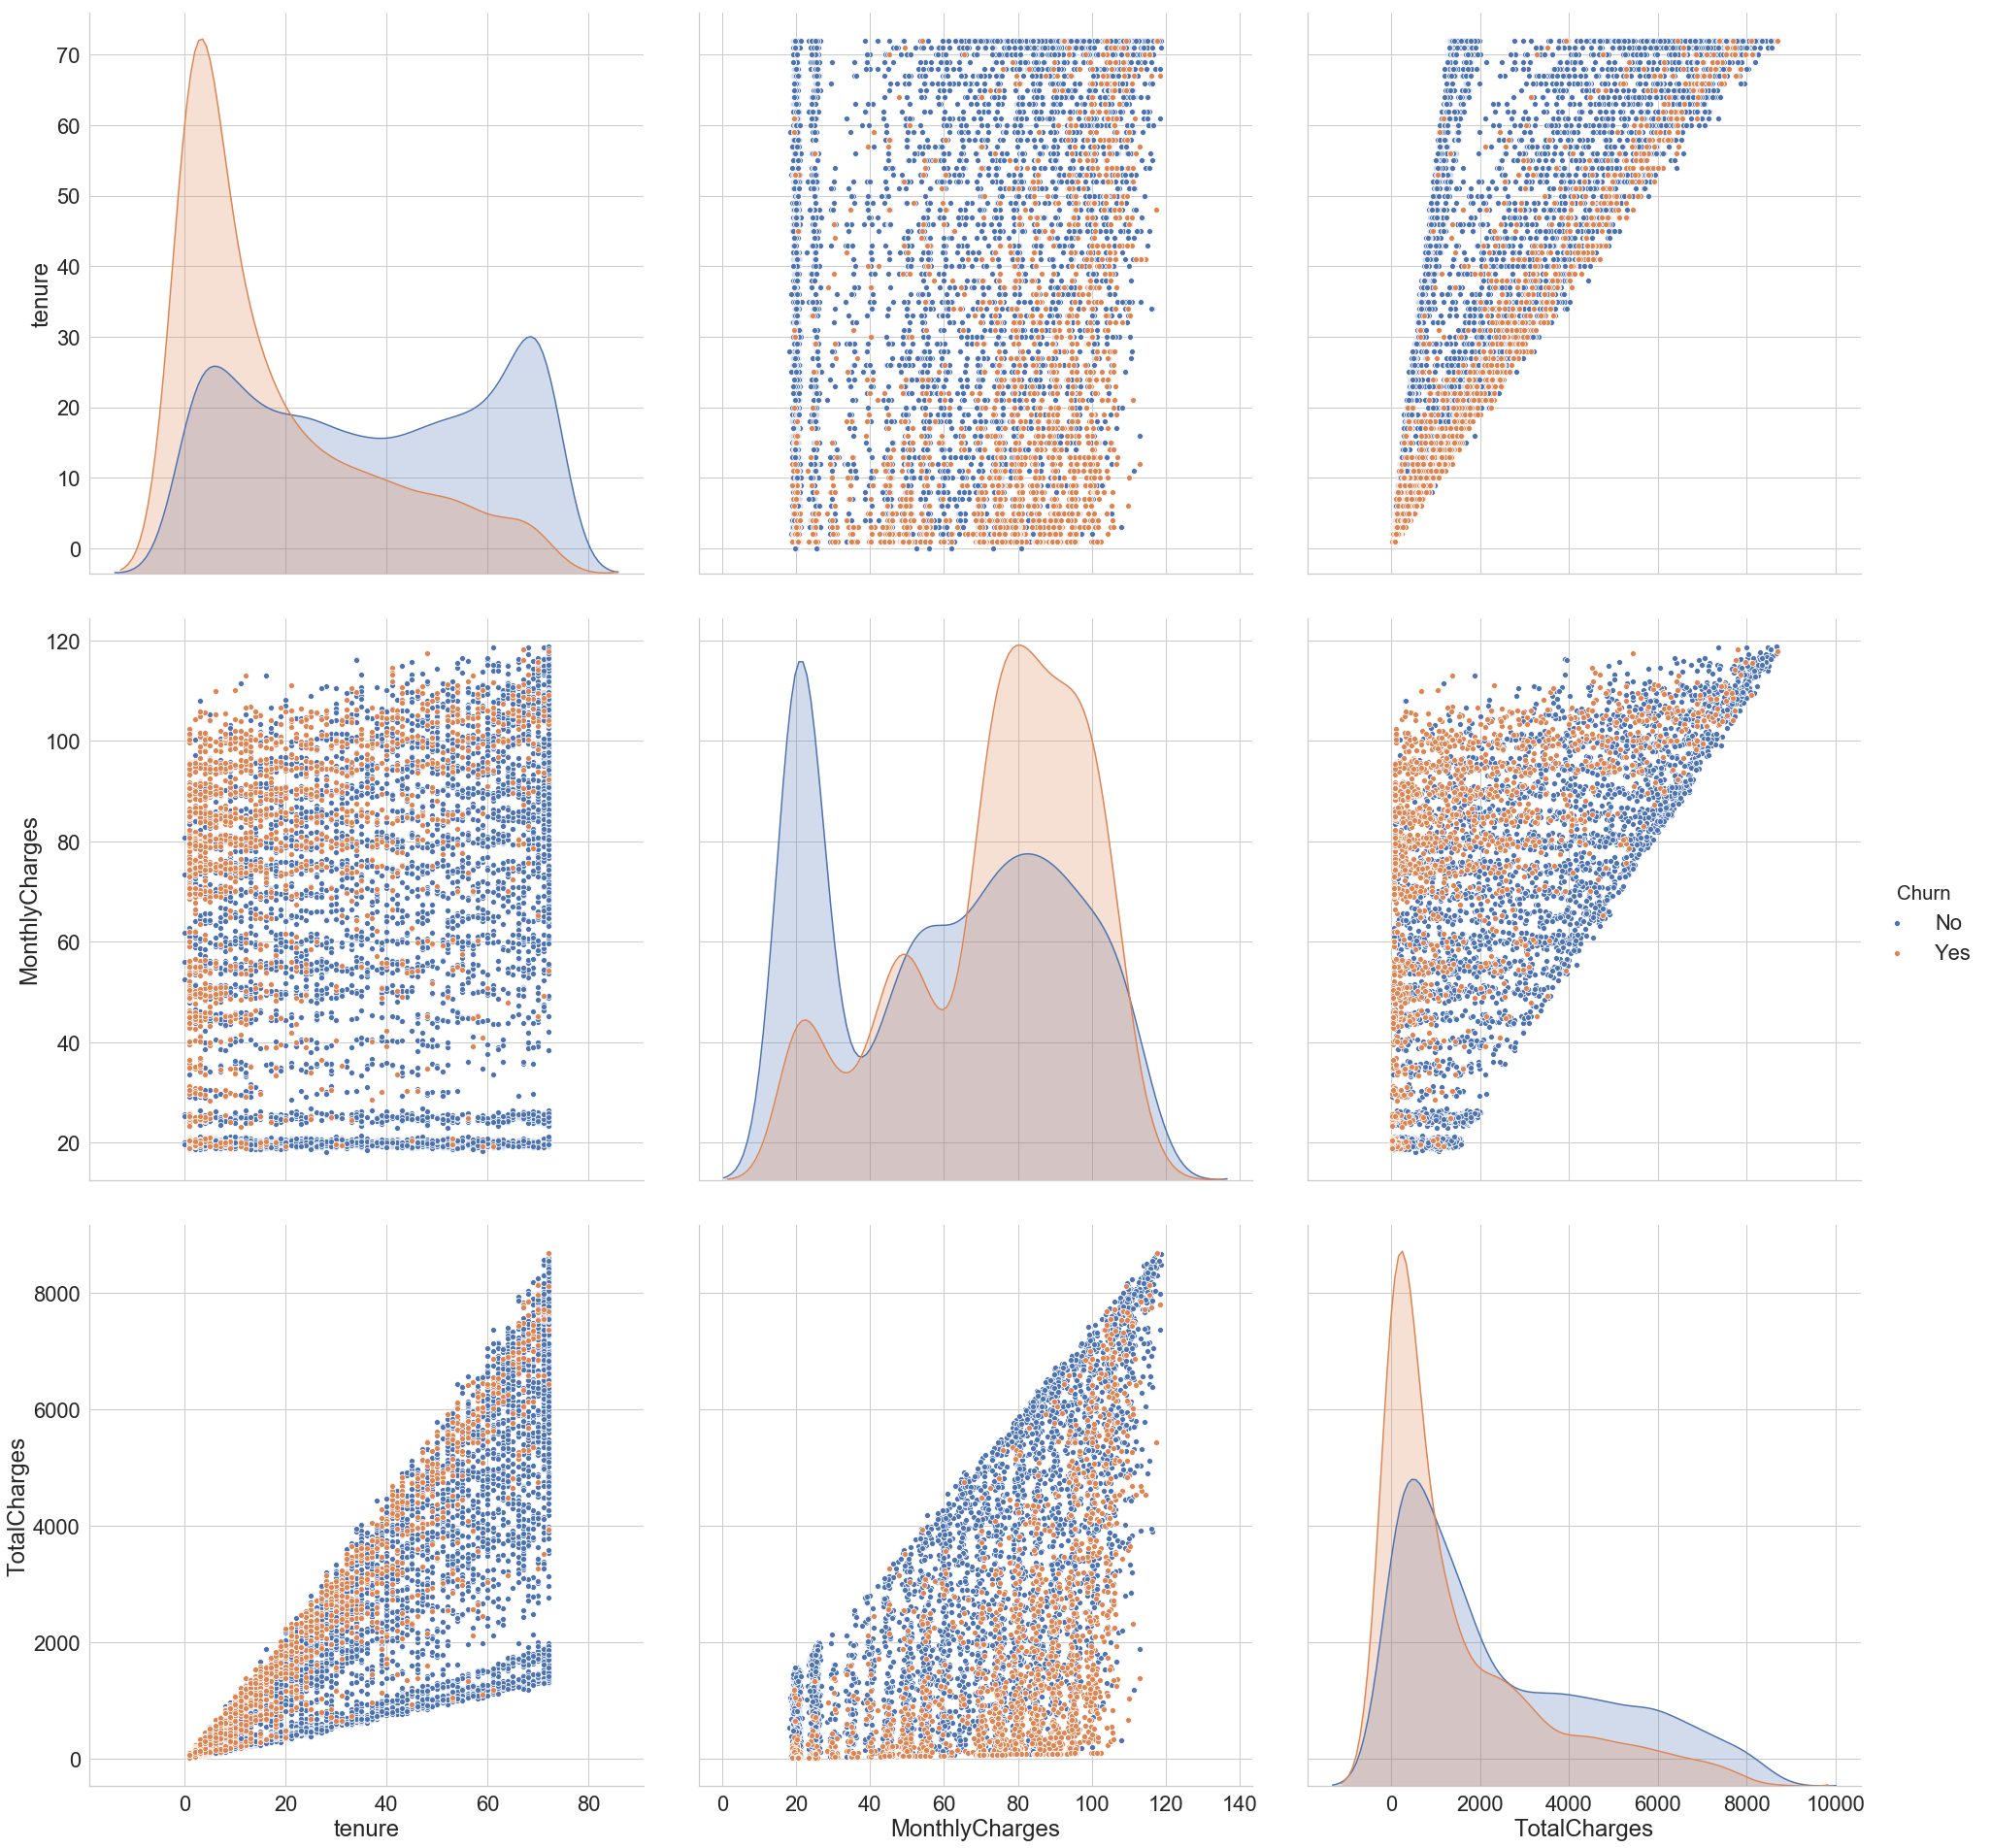

In [41]:
sns.set(font_scale=2)
sns.set_style(style='whitegrid')
sns.pairplot(df, hue="Churn", height=9)

## Binning the data

In [42]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [43]:
df['tenure_bin'] = pd.cut(df.tenure, bins=[0,10,20,30,40,50,60,70,80], labels=[0,10,20,30,40,50,60,70])

Text(0.5, 0, 'Tenure bin, months')

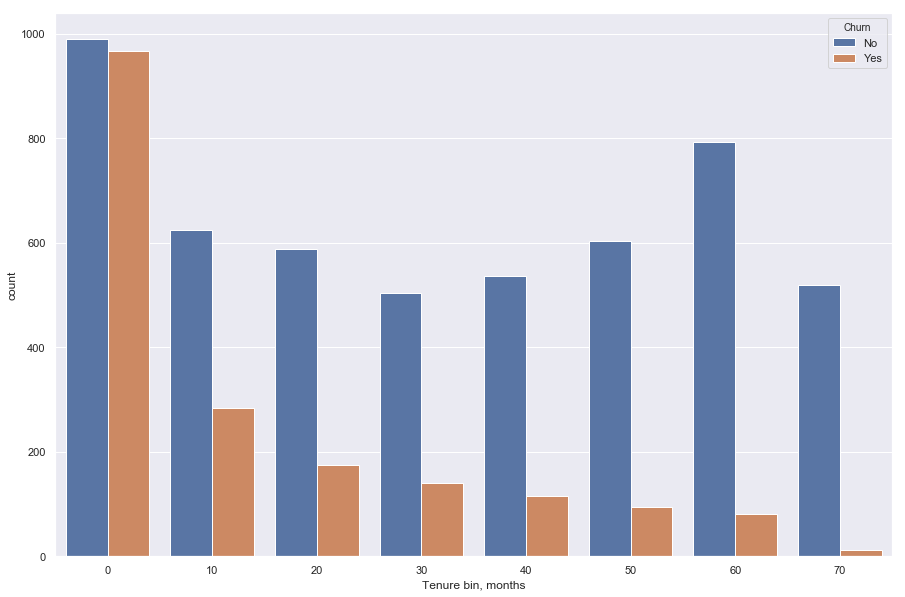

In [44]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot('tenure_bin', hue='Churn', data=df)
plt.xlabel('Tenure bin, months')

In [45]:
#adding the tenure_bins to the encoded dataframe
encoded_df['tenure_bin'] = df.tenure_bin

# Preprocessing

In [46]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn,tenure_bin
0,0,0,1,0,0,1,0,0,2,0,...,0,0,1,2,1,29.85,29.85,5375,0,0
1,1,0,0,0,1,0,0,2,0,2,...,0,1,0,3,34,56.95,1889.50,3962,0,30
2,1,0,0,0,1,0,0,2,2,0,...,0,0,1,3,2,53.85,108.15,2564,1,0
3,1,0,0,0,0,1,0,2,0,2,...,0,1,0,0,45,42.30,1840.75,5535,0,40
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,2,2,70.70,151.65,6511,1,0


In [47]:
encoded_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
tenure               0
MonthlyCharges       0
TotalCharges        11
customerID           0
Churn                0
tenure_bin          11
dtype: int64

In [48]:
encoded_df = encoded_df.fillna(0)

In [49]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn,tenure_bin
0,0,0,1,0,0,1,0,0,2,0,...,0,0,1,2,1,29.85,29.85,5375,0,0
1,1,0,0,0,1,0,0,2,0,2,...,0,1,0,3,34,56.95,1889.50,3962,0,30
2,1,0,0,0,1,0,0,2,2,0,...,0,0,1,3,2,53.85,108.15,2564,1,0
3,1,0,0,0,0,1,0,2,0,2,...,0,1,0,0,45,42.30,1840.75,5535,0,40
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,2,2,70.70,151.65,6511,1,0


## Define features and target

In [50]:
features = encoded_df.drop(columns=['Churn', 'tenure_bin', 'customerID', 'gender','SeniorCitizen','PhoneService']).columns

In [51]:
features

Index(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [52]:
target = ['Churn']

## Dealing with imbalance by downsampling

Imbalance in the data can bias the model to favor the majority class. Since we have more customers (~75%) that do not churn, our model will fit to the non-churn customers more favorably. In order to control for this, we can down-sample the majority class (non-churn) to match the minority class (churn).

 - 1 = Churn
 - 0 = non-Churn

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [54]:
down = encoded_df[encoded_df.Churn == 1]
up = encoded_df[encoded_df.Churn == 0]
down = down.Churn.count()
up = up.Churn.count()
print(f'Churn Fraction: {down/(up+down)}')

Churn Fraction: 0.2653698707936959


In [55]:
#let's first separate majority class and minority class and resample

df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

## Define X and y

In [56]:
from sklearn.model_selection import train_test_split
y = df_downsampled[target]
X = df_downsampled[features]

Since we don't a significant amount of data to train on, we'll use a 90/10 train/test split.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

# Initial Modeling

Our goal is to not only predict whether a customer will churn but also get insight into why so we can intervene and change the trajectory of a customer. 

In [58]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,\
precision_score, recall_score, precision_recall_curve, classification_report, roc_auc_score

## Logistic Regression Baseline

In [59]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42, max_iter=1000, )

In [60]:
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred_logr))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logr)}')
print(f'Precision: {precision_score(y_test, y_pred_logr)}')
print(f'Recall: {recall_score(y_test, y_pred_logr)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred_logr)}')

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       187
           1       0.76      0.79      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374

Accuracy: 0.767379679144385
Precision: 0.7577319587628866
Recall: 0.786096256684492
Confusion Matrix: [[140  47]
 [ 40 147]]


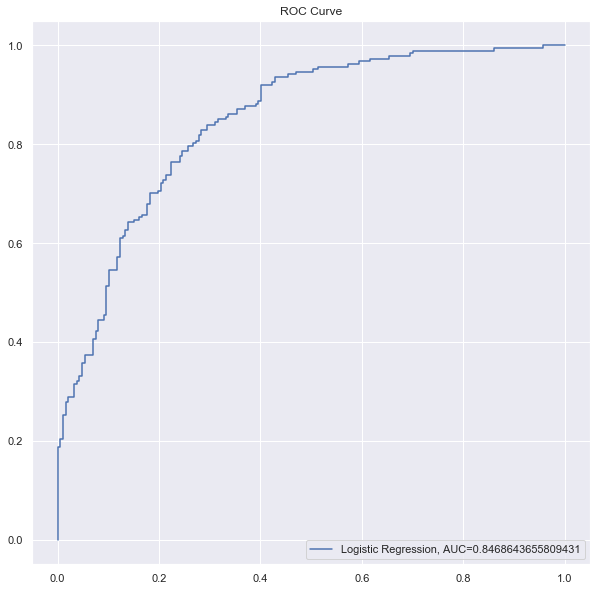

In [62]:
fig, ax = plt.subplots(figsize = (10,10))
y_prob = logr.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"Logistic Regression, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

### Classification model interpretation

Our initial logistic regression model did relatively well. For our test dataset we had 200 non-churn customers and 174 churn customers. Looking at the confusion matrix output, our model was able to predict non-churn and churn with a 79% (157 out of 200) and 85% (148 out of 174) accuracy, respectively. 

## LightGBM

In [63]:
import lightgbm as lgb

In [64]:
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

In [65]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       187
           1       0.77      0.76      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374



In [67]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.767379679144385
Precision: 0.7717391304347826
Recall: 0.7593582887700535
Confusion Matrix: [[145  42]
 [ 45 142]]


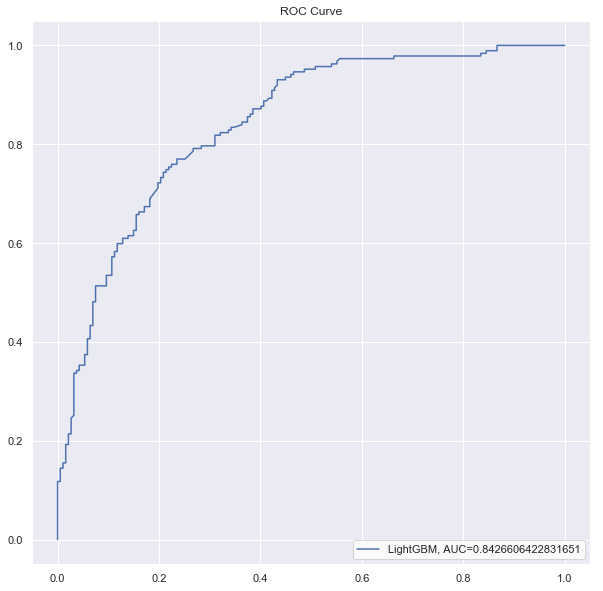

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

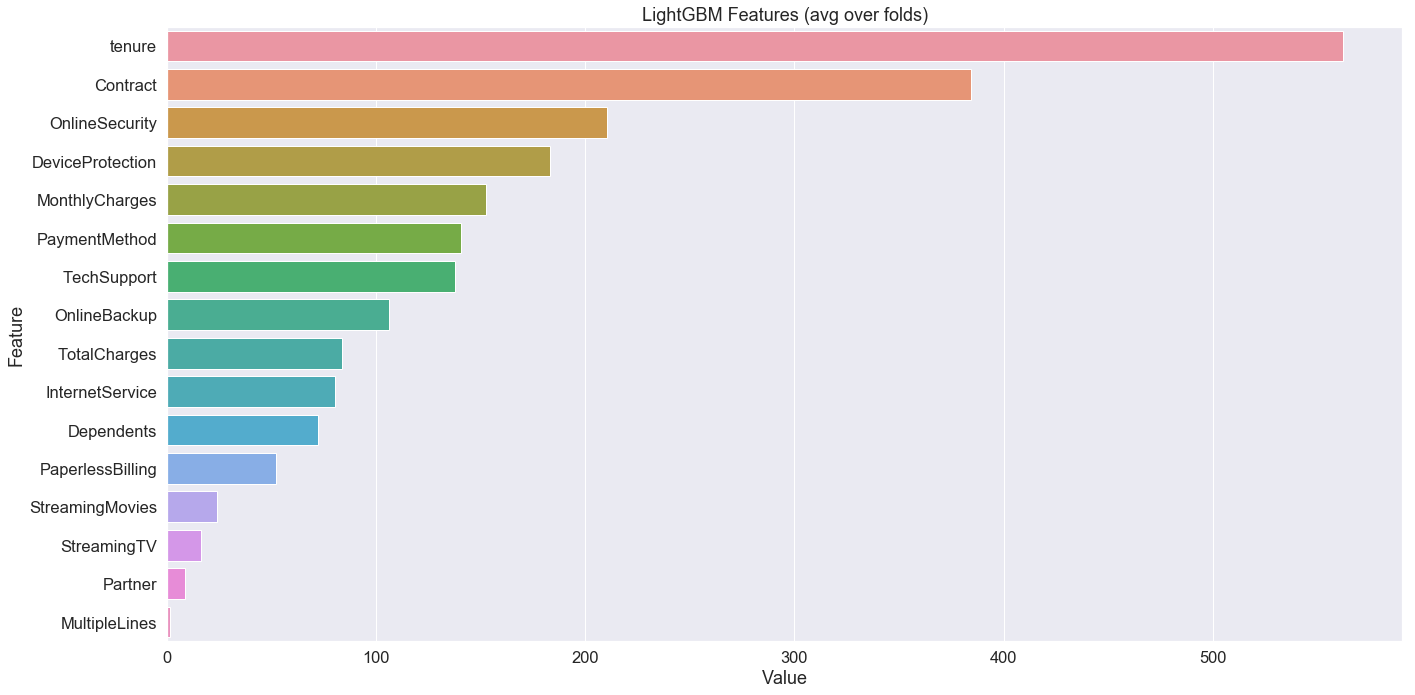

In [69]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# Feature Engineering

From our correlation analysis, we can see the feature importance associated with the LightGBM model resembles our initial intuition for features to consider for feature engineering.
 - Contract          0.396713
 - tenure            0.352229
 - OnlineSecurity    0.289309
 - TechSupport       0.282492
 - TotalCharges      0.199484

LightGBM

In [70]:
feature_imp.sort_values(by="Value", ascending=False).head()

,Value,Feature
15,562.519812,tenure
14,384.534617,Contract
13,210.286366,OnlineSecurity
12,183.283200,DeviceProtection
11,152.607066,MonthlyCharges


## Total number of services enrolled in

In [71]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [72]:
encoded_df['services'] = encoded_df[services].apply(lambda x: x.sum(), axis=1)

In [73]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn,tenure_bin,services
0,0,0,1,0,0,1,0,0,2,0,...,0,1,2,1,29.85,29.85,5375,0,0,4
1,1,0,0,0,1,0,0,2,0,2,...,1,0,3,34,56.95,1889.50,3962,0,30,5
2,1,0,0,0,1,0,0,2,2,0,...,0,1,3,2,53.85,108.15,2564,1,0,6
3,1,0,0,0,0,1,0,2,0,2,...,1,0,0,45,42.30,1840.75,5535,0,40,7
4,0,0,0,0,1,0,1,0,0,0,...,0,1,2,2,70.70,151.65,6511,1,0,3


### Model test

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       187
           1       0.77      0.76      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374

Accuracy: 0.7700534759358288
Precision: 0.772972972972973
Recall: 0.7647058823529411
Confusion Matrix: [[145  42]
 [ 44 143]]


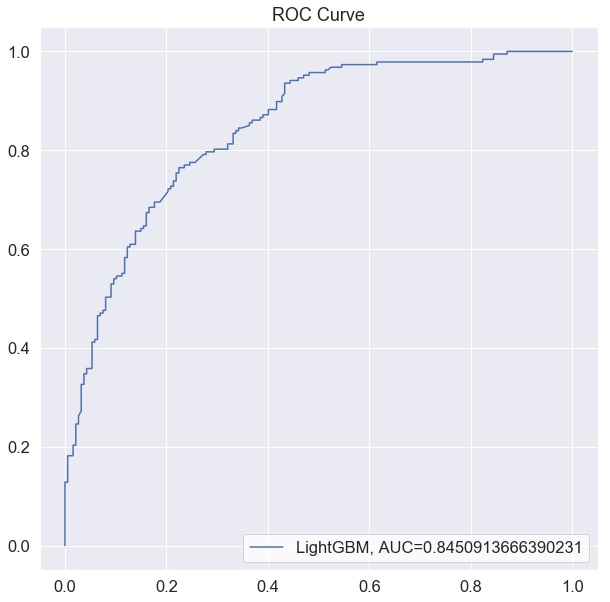

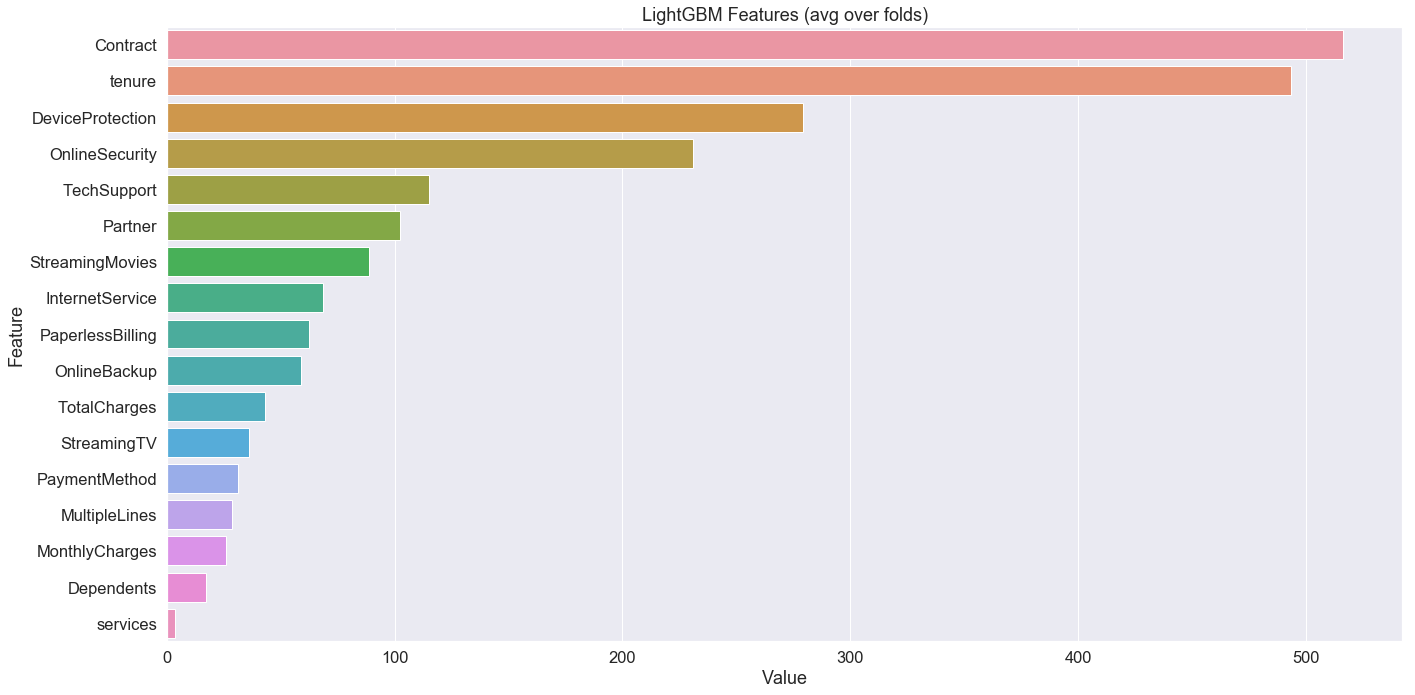

In [74]:
features = encoded_df.drop(columns=['Churn','tenure_bin','customerID','gender',
                                    'SeniorCitizen','PhoneService']).columns
target = ['Churn']
df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()
y = df_downsampled[target]
X = df_downsampled[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

#LightGBM
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## Average monthly price per service

In [75]:
encoded_df['avg_price'] = encoded_df.MonthlyCharges / encoded_df.services

In [76]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn,tenure_bin,services,avg_price
0,0,0,1,0,0,1,0,0,2,0,...,1,2,1,29.85,29.85,5375,0,0,4,7.462500
1,1,0,0,0,1,0,0,2,0,2,...,0,3,34,56.95,1889.50,3962,0,30,5,11.390000
2,1,0,0,0,1,0,0,2,2,0,...,1,3,2,53.85,108.15,2564,1,0,6,8.975000
3,1,0,0,0,0,1,0,2,0,2,...,0,0,45,42.30,1840.75,5535,0,40,7,6.042857
4,0,0,0,0,1,0,1,0,0,0,...,1,2,2,70.70,151.65,6511,1,0,3,23.566667


### Model test

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       187
           1       0.77      0.76      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374

Accuracy: 0.7700534759358288
Precision: 0.772972972972973
Recall: 0.7647058823529411
Confusion Matrix: [[145  42]
 [ 44 143]]


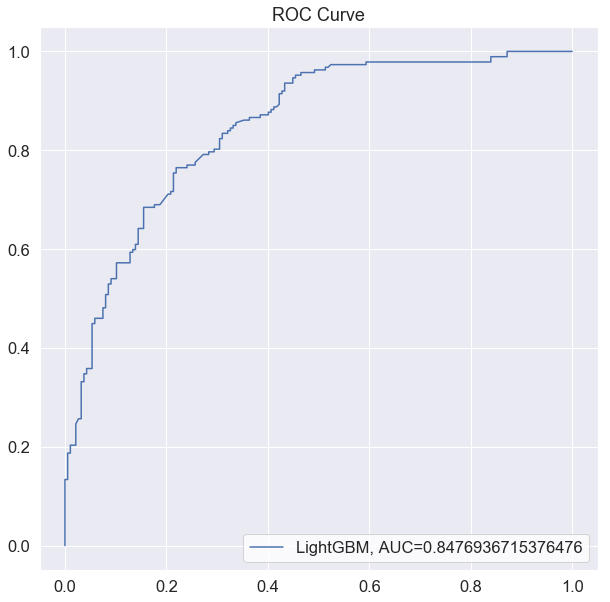

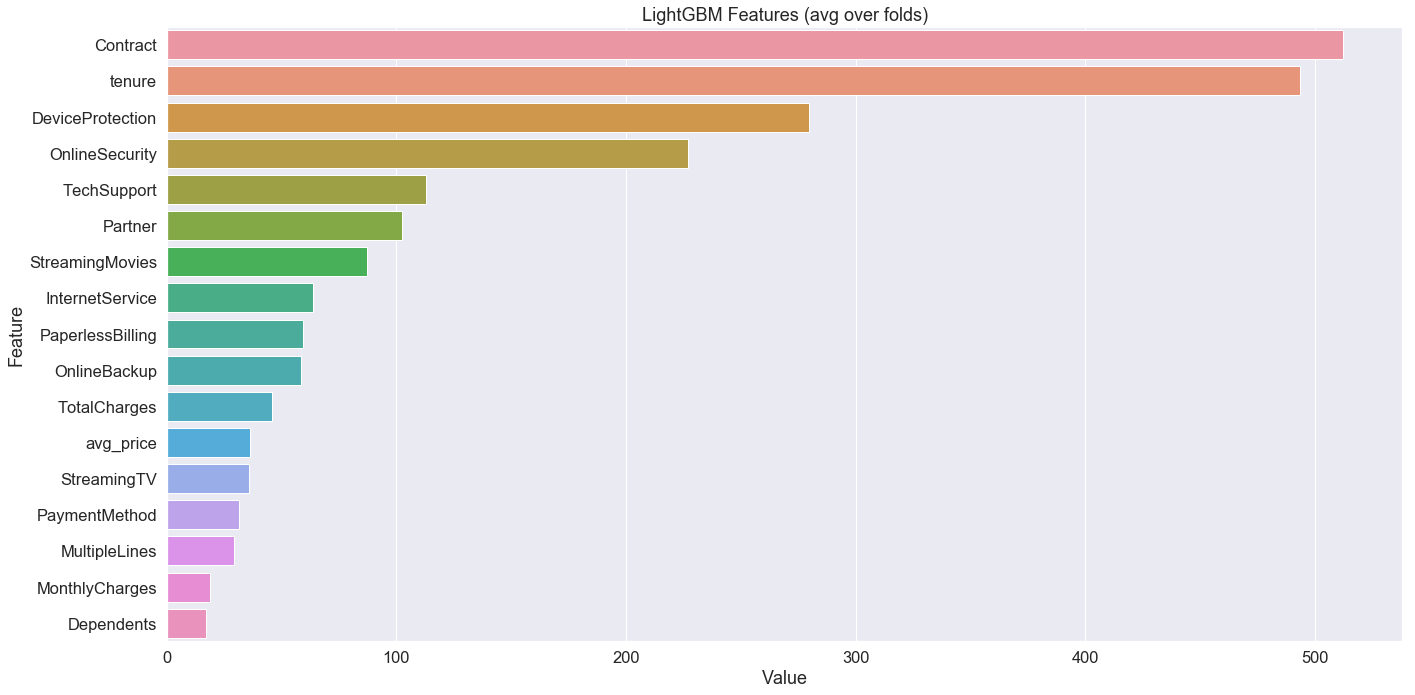

In [77]:
features = encoded_df.drop(columns=['Churn','tenure_bin','customerID','gender','services',
                                    'SeniorCitizen','PhoneService']).columns
target = ['Churn']
df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()
y = df_downsampled[target]
X = df_downsampled[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

#LightGBM
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## Extra Charges

In [78]:
encoded_df['extra_charges'] = (encoded_df.MonthlyCharges * encoded_df.tenure) - encoded_df.TotalCharges

In [79]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn,tenure_bin,services,avg_price,extra_charges
0,0,0,1,0,0,1,0,0,2,0,...,2,1,29.85,29.85,5375,0,0,4,7.462500,0.00
1,1,0,0,0,1,0,0,2,0,2,...,3,34,56.95,1889.50,3962,0,30,5,11.390000,46.80
2,1,0,0,0,1,0,0,2,2,0,...,3,2,53.85,108.15,2564,1,0,6,8.975000,-0.45
3,1,0,0,0,0,1,0,2,0,2,...,0,45,42.30,1840.75,5535,0,40,7,6.042857,62.75
4,0,0,0,0,1,0,1,0,0,0,...,2,2,70.70,151.65,6511,1,0,3,23.566667,-10.25


### Model test

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       187
           1       0.78      0.76      0.77       187

    accuracy                           0.78       374
   macro avg       0.78      0.78      0.78       374
weighted avg       0.78      0.78      0.78       374

Accuracy: 0.7754010695187166
Precision: 0.7814207650273224
Recall: 0.7647058823529411
Confusion Matrix: [[147  40]
 [ 44 143]]


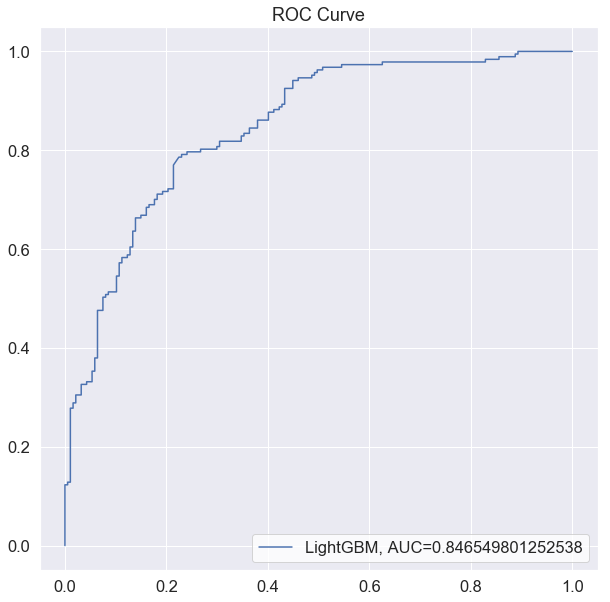

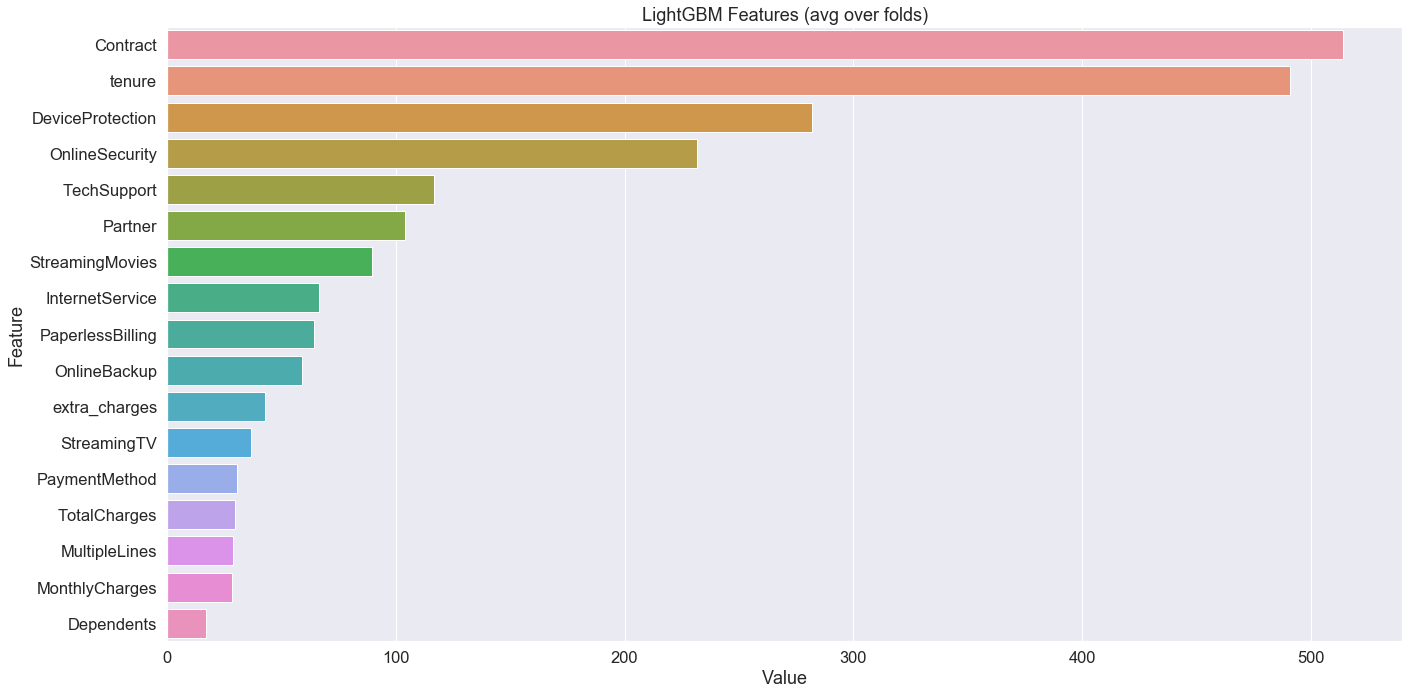

In [80]:
features = encoded_df.drop(columns=['Churn','tenure_bin','customerID','gender','services','avg_price',
                                    'SeniorCitizen','PhoneService']).columns
target = ['Churn']
df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()
y = df_downsampled[target]
X = df_downsampled[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

#LightGBM
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

We'll keep extra_charges and avg_price as new features

In [81]:
features = encoded_df.drop(columns=['Churn','tenure_bin','customerID','gender','services',
                                    'SeniorCitizen','PhoneService']).columns
target = ['Churn']
df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()
y = df_downsampled[target]
X = df_downsampled[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

# Modeling

## Scikit-Learn and XGBoost Classifiers

In [82]:
#Import classifiers
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [83]:
#instantiate models
seed = 42
clf = RandomForestClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
xtr = ExtraTreesClassifier(random_state=seed)
lgbm = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)

In [84]:
classifiers = [('Random Forest', clf), ('XGBoost', xgb), ('ExtraTrees', xtr),
              ('Logistic Regression', logr), ('LightGBM', lgbm)]

name: Random Forest
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       187
           1       0.79      0.66      0.72       187

    accuracy                           0.74       374
   macro avg       0.75      0.74      0.74       374
weighted avg       0.75      0.74      0.74       374

accuracy: 0.7433155080213903
precision: 0.7898089171974523
recall: 0.6631016042780749
confusion matrix: [[154  33]
 [ 63 124]]
------------------------------


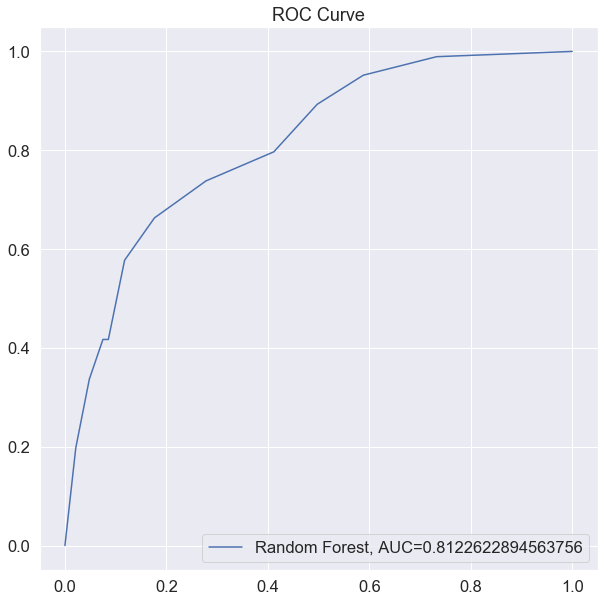

name: XGBoost
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       187
           1       0.76      0.78      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374

accuracy: 0.767379679144385
precision: 0.7631578947368421
recall: 0.7754010695187166
confusion matrix: [[142  45]
 [ 42 145]]
------------------------------


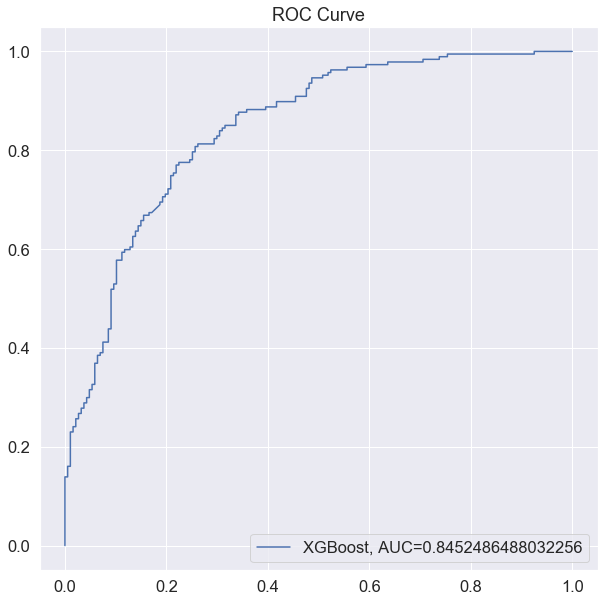

name: ExtraTrees
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       187
           1       0.78      0.70      0.74       187

    accuracy                           0.75       374
   macro avg       0.75      0.75      0.75       374
weighted avg       0.75      0.75      0.75       374

accuracy: 0.7513368983957219
precision: 0.7797619047619048
recall: 0.7005347593582888
confusion matrix: [[150  37]
 [ 56 131]]
------------------------------


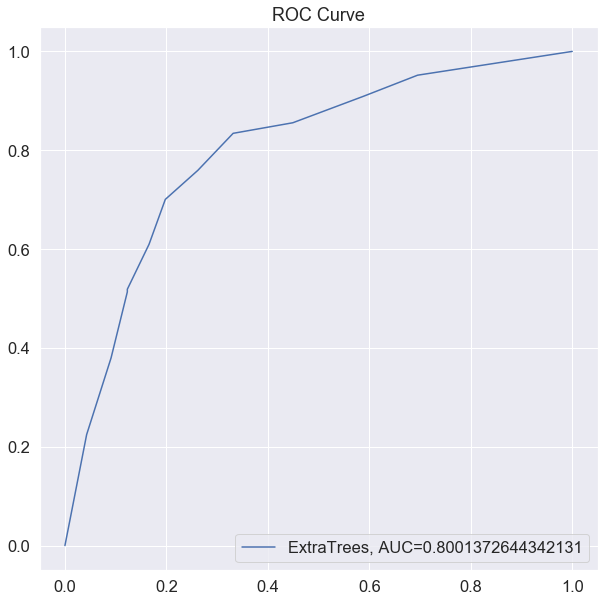

name: Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       187
           1       0.76      0.79      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374

accuracy: 0.7700534759358288
precision: 0.7589743589743589
recall: 0.7914438502673797
confusion matrix: [[140  47]
 [ 39 148]]
------------------------------


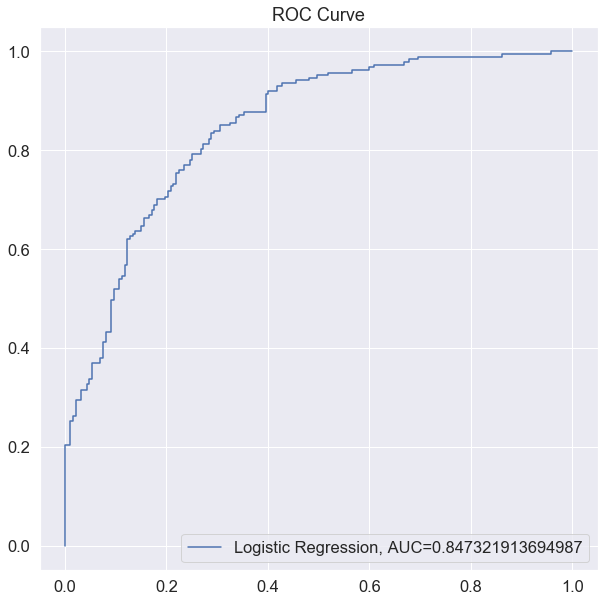

name: LightGBM
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       187
           1       0.77      0.75      0.76       187

    accuracy                           0.76       374
   macro avg       0.76      0.76      0.76       374
weighted avg       0.76      0.76      0.76       374

accuracy: 0.7647058823529411
precision: 0.7704918032786885
recall: 0.7540106951871658
confusion matrix: [[145  42]
 [ 46 141]]
------------------------------


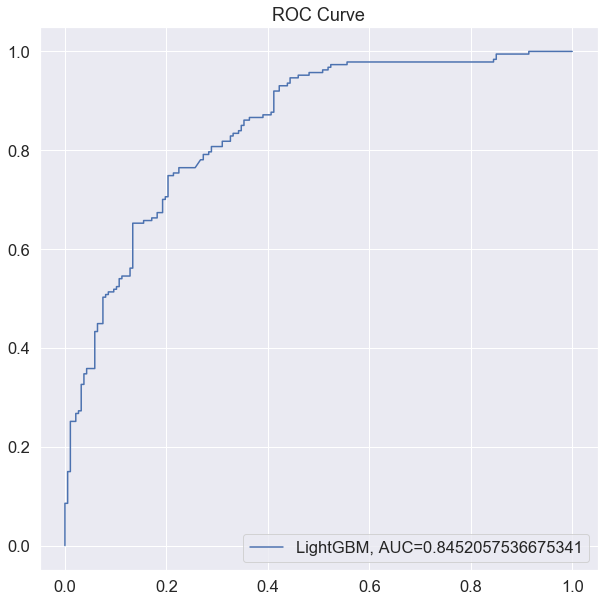

In [85]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf_algo in classifiers:    
 
    # Fit clf to the training set
    clf_algo.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf_algo.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
   
    # Evaluate clf's accuracy on the test set
    print(f'name: {clf_name}')
    print(classification_report(y_test, y_pred))
    # Evaluate clf's accuracy on the test set 
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'confusion matrix: {cm}')
    print('------------------------------')
    
    fig, ax = plt.subplots(figsize = (10,10))
    y_prob = clf_algo.predict_proba(X_test)[::,1]
    y_pred_proba = y_prob
    fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
    auc_rand = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.show()

name: Voting Classifier
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       187
           1       0.78      0.78      0.78       187

    accuracy                           0.78       374
   macro avg       0.78      0.78      0.78       374
weighted avg       0.78      0.78      0.78       374

accuracy: 0.7780748663101604
precision: 0.7795698924731183
recall: 0.7754010695187166
confusion matrix: [[146  41]
 [ 42 145]]
------------------------------


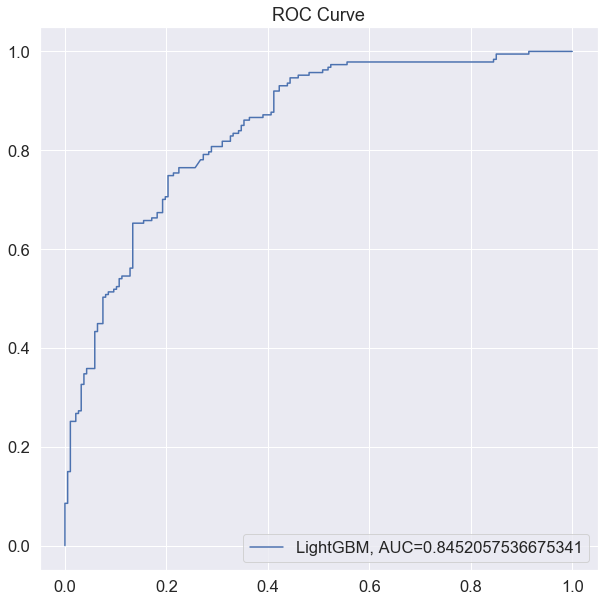

In [86]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


# Evaluate clf's accuracy on the test set
print(f'name: Voting Classifier')
print(classification_report(y_test, y_pred))
# Evaluate clf's accuracy on the test set 
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'confusion matrix: {cm}')
print('------------------------------')

fig, ax = plt.subplots(figsize = (10,10))
y_prob = clf_algo.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

### Tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [88]:
# Number of trees for tree ensambles
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 8, 12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

#### Random Forest

In [89]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [100, 125, 150, 175, 200, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [6, 8, 12],
 'min_samples_split': [10, 20, 30],
 'n_estimators': [200, 600, 1000]}


In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 20, \
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   51.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [91]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [92]:
rf_params = rf_random.best_params_

#### XGBoost

In [93]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              #'objective':['reg:linear'],
              'learning_rate': [0.01, 0.1],
              'max_depth': [6, 12], 
              'min_child_weight': [2, 6],
              #'verbosity': [1],
              'subsample': [1.0],
              'colsample_bytree': [0.3, 0.5],
              'gamma': [0],
              'n_estimators': [100, 500, 1000]}

xgb_rand = RandomizedSearchCV(xgb,
                              parameters,
                              cv = 3,
                              n_jobs = 4,
                              verbose=True)

xgb_rand.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   18.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, scal...
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'cols

In [94]:
xgb_rand.best_params_

{'subsample': 1.0,
 'nthread': 4,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [95]:
xgb_params = xgb_rand.best_params_

#### Extra Randomized Trees

In [96]:
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
             }

In [97]:
xtr_tune = RandomizedSearchCV(estimator = xtr, param_distributions = param_dist, n_iter = 50, \
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xtr_tune.fit(X_train, y_train)
xtr_tune.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   57.5s finished


{'n_estimators': 1000,
 'min_samples_split': 20,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [98]:
xtr_params = xtr_tune.best_params_

### Tuned Model

In [99]:
#instantiate models
seed = 42
new_clf = RandomForestClassifier(**rf_random.best_params_, random_state=seed)
new_xgb = XGBClassifier(**xgb_rand.best_params_, random_state=seed)
new_xtr = ExtraTreesClassifier(**xtr_tune.best_params_, random_state=seed)
new_lgbm = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)

In [100]:
classifiers = [('Random Forest', new_clf), ('XGBoost', new_xgb), ('ExtraTrees', new_xtr)]

name: Random Forest
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       187
           1       0.77      0.78      0.77       187

    accuracy                           0.77       374
   macro avg       0.77      0.77      0.77       374
weighted avg       0.77      0.77      0.77       374

accuracy: 0.7727272727272727
precision: 0.7684210526315789
recall: 0.7807486631016043
confusion matrix: [[143  44]
 [ 41 146]]


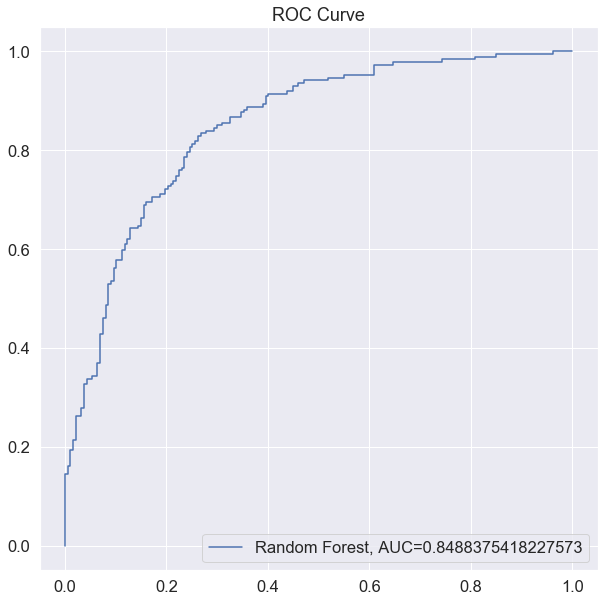

name: XGBoost
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       187
           1       0.77      0.79      0.78       187

    accuracy                           0.78       374
   macro avg       0.78      0.78      0.78       374
weighted avg       0.78      0.78      0.78       374

accuracy: 0.7754010695187166
precision: 0.7668393782383419
recall: 0.7914438502673797
confusion matrix: [[142  45]
 [ 39 148]]


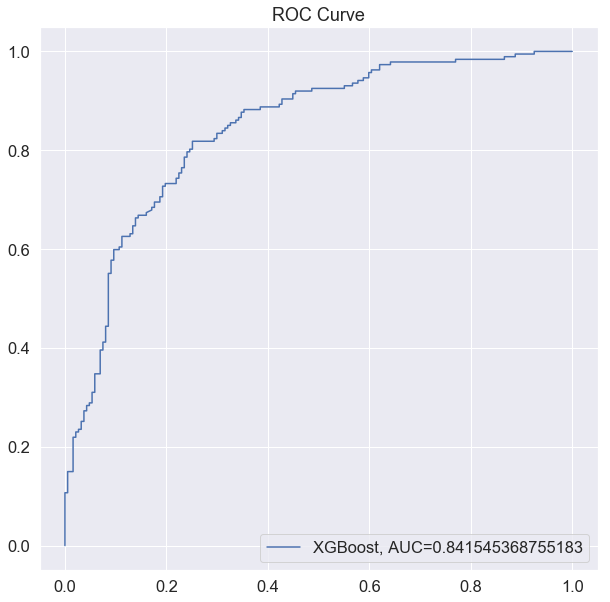

name: ExtraTrees
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       187
           1       0.75      0.77      0.76       187

    accuracy                           0.76       374
   macro avg       0.76      0.76      0.76       374
weighted avg       0.76      0.76      0.76       374

accuracy: 0.7593582887700535
precision: 0.7539267015706806
recall: 0.7700534759358288
confusion matrix: [[140  47]
 [ 43 144]]


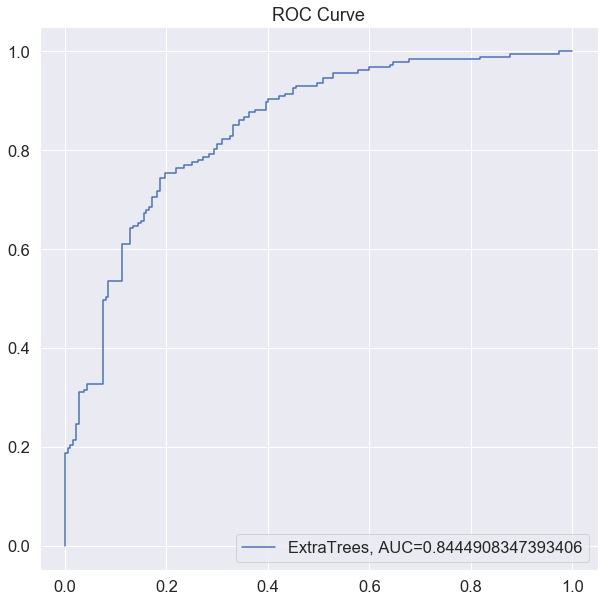

In [101]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf_algo in classifiers:    

    # Fit clf to the training set
    clf_algo.fit(X_train, y_train)    
    
    # Predict y_pred
    y_pred = clf_algo.predict(X_test)
          
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'name: {clf_name}')
    print(classification_report(y_test, y_pred))
    # Evaluate clf's accuracy on the test set 
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'confusion matrix: {cm}')
    fig, ax = plt.subplots(figsize = (10,10))
    y_prob = clf_algo.predict_proba(X_test)[::,1]
    y_pred_proba = y_prob
    fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
    auc_rand = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.show()

Voting Classifier: 
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       187
           1       0.77      0.79      0.78       187

    accuracy                           0.78       374
   macro avg       0.78      0.78      0.78       374
weighted avg       0.78      0.78      0.78       374

accuracy: 0.7780748663101604
precision: 0.7708333333333334
recall: 0.7914438502673797
confusion matrix: [[143  44]
 [ 39 148]]


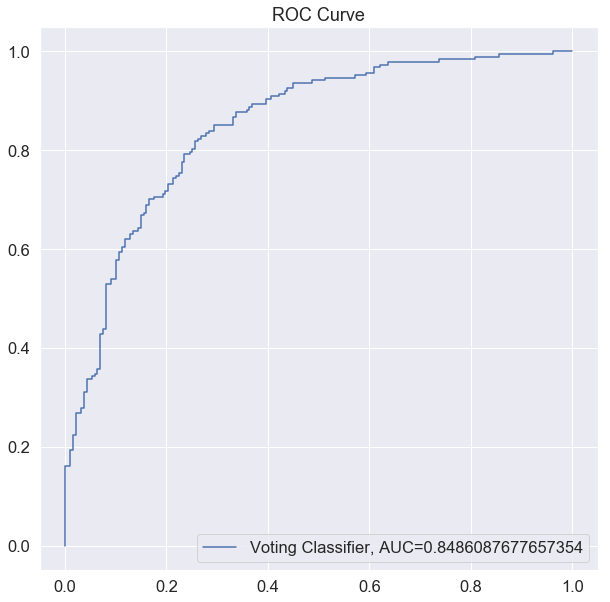

In [102]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers, 
                      voting='soft', 
                      weights=[9,1,1,5]
                     )

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Voting Classifier: ')
print(classification_report(y_test, y_pred))
    # Evaluate clf's accuracy on the test set 
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'confusion matrix: {cm}')
fig, ax = plt.subplots(figsize = (10,10))
y_prob = vc.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"Voting Classifier, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()